<a href="https://colab.research.google.com/github/Serghii777/Home_work_11/blob/main/Hw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import layers, models
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

train_data = train_data.reshape(-1, 28, 28, 1).astype('float32') / 255
test_data = test_data.reshape(-1, 28, 28, 1).astype('float32') / 255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


history = model.fit(
    train_data, train_labels,
    batch_size=128,
    epochs=50,
    validation_data=(test_data, test_labels),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
469/469 [==============================] - 14s 13ms/step - loss: 0.5858 - accuracy: 0.7985 - val_loss: 1.0408 - val_accuracy: 0.6625 - lr: 0.0010
Epoch 2/50
469/469 [==============================] - 6s 12ms/step - loss: 0.3676 - accuracy: 0.8642 - val_loss: 0.3046 - val_accuracy: 0.8883 - lr: 0.0010
Epoch 3/50
469/469 [==============================] - 5s 10ms/step - loss: 0.3171 - accuracy: 0.8830 - val_loss: 0.2836 - val_accuracy: 0.8970 - lr: 0.0010
Epoch 4/50
469/469 [==============================] - 5s 11ms/step - loss: 0.2882 - accuracy: 0.8940 - val_loss: 0.2899 - val_accuracy: 0.8926 - lr: 0.0010
Epoch 5/50
469/469 [==============================] - 5s 10ms/step - loss: 0.2689 - accuracy: 0.9001 - val_loss: 0.2519 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 6/50
469/469 [==============================] - 5s 11ms/step - loss: 0.2536 - accuracy: 0.9069 - val_loss: 0.2511 - val_accuracy: 0.9092 - lr: 0.0010
Epoch 7/50
469/469 [==============================] - 5s 10ms/s

In [6]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Точність на тестовому наборі: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 2s 4ms/step - loss: 0.1810 - accuracy: 0.9397
Точність на тестовому наборі: 93.97%


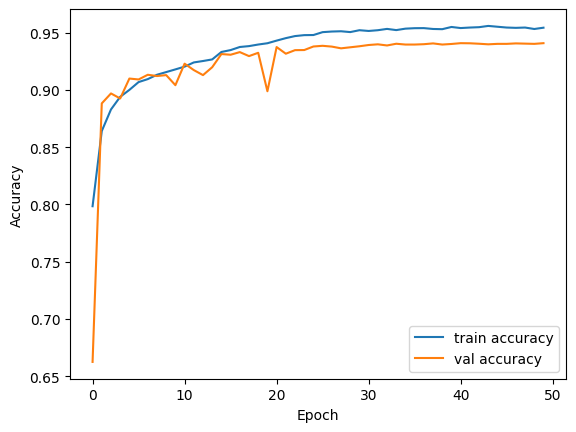

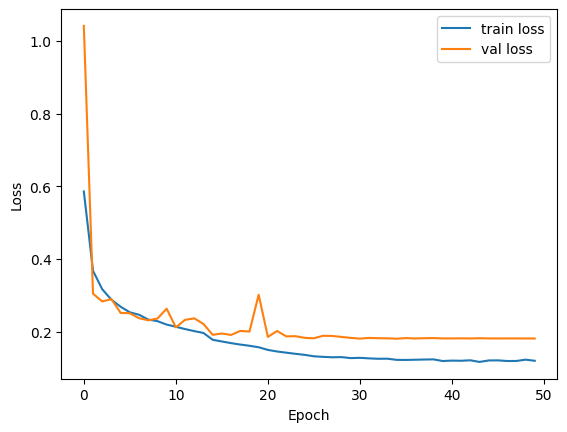

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Порівняння точності моделей**
**Модель багатошарова нейронна мережа (MLP)**

Validation Accuracy: 86.65%
Best Validation Accuracy So Far: 90.12%
Test Accuracy: 89.99%
**Модель згорткова нейронна мережа (CNN)**

Validation Accuracy: 94.09%
Test Accuracy: 93.97%

**Висновки**
Згорткова нейронна мережа (CNN) показала значно вищу точність як на валідаційному, так і на тестовому наборах даних порівняно з багатошаровою нейронною мережею (MLP). Валідаційна точність CNN досягла 94.09%, тоді як у MLP — 90.12%. Тестова точність CNN становить 93.97%, тоді як у MLP — 89.99%.

Для задач класифікації зображень, де просторові залежності є важливими, згорткові нейронні мережі (CNN) є більш підходящими та ефективними. Модель CNN, представлена у цьому порівнянні, продемонструвала значно кращі результати і є більш надійною для цієї задачі.

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_train = tf.image.resize_with_crop_or_pad(tf.expand_dims(x_train, axis=-1), 48, 48)
x_test = tf.image.resize_with_crop_or_pad(tf.expand_dims(x_test, axis=-1), 48, 48)


x_train = tf.cast(x_train, tf.float32) / 255.0
x_test = tf.cast(x_test, tf.float32) / 255.0


x_train = tf.image.grayscale_to_rgb(x_train)
x_test = tf.image.grayscale_to_rgb(x_test)


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))


for layer in base_model.layers[:-4]:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

In [9]:
model = Model(inputs=base_model.input, outputs=output)


model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(x_train)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)


history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    validation_data=(x_test, y_test),
                    epochs=50,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1875/1875 [==============================] - 74s 38ms/step - loss: 0.6831 - accuracy: 0.7608 - val_loss: 0.4765 - val_accuracy: 0.8270 - lr: 1.0000e-04
Epoch 2/50
1875/1875 [==============================] - 74s 39ms/step - loss: 0.4525 - accuracy: 0.8405 - val_loss: 0.4176 - val_accuracy: 0.8400 - lr: 1.0000e-04
Epoch 3/50
1875/1875 [==============================] - 71s 38ms/step - loss: 0.4107 - accuracy: 0.8543 - val_loss: 0.4052 - val_accuracy: 0.8448 - lr: 1.0000e-04
Epoch 4/50
1875/1875 [==============================] - 72s 38ms/step - loss: 0.3840 - accuracy: 0.8636 - val_loss: 0.3482 - val_accuracy: 0.8731 - lr: 1.0000e-04
Epoch 5/50
1875/1875 [==============================] - 72s 39ms/step - loss: 0.3644 - accuracy: 0.8684 - val_loss: 0.3385 - val_accuracy: 0.8810 - lr: 1.0000e-04
Epoch 6/50
1875/1875 [==============================] - 72s 38ms/step - loss: 0.3429 - accuracy: 0.8760 - val_loss: 0.3247 - val_accuracy: 0.8851 - lr: 1.0000e-04
Epoch 7/50
1875/1875 [

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 4s 12ms/step - loss: 0.2700 - accuracy: 0.9061
Test accuracy: 0.9061
